# Lab: Decision Trees and Random Forests

## Objectives
By the end of this lab, you will:
- Understand how decision trees work and their limitations.
- Observe the instability of decision trees.
- Learn how random forests improve stability and accuracy.
- Implement both models using `scikit-learn`.
- Evaluate performance using cross-validation and feature importance.
- Use cross-validation for hyperparameter selection.


## **1. Introduction**
Decision Trees are powerful models but can be unstable, meaning small variations in data can lead to significantly different trees. Random Forests, an ensemble method, mitigate this issue by averaging multiple decision trees trained on random subsets of data.

### **Dataset: Banknote Authentication**
For this lab, we will use the **Banknote Authentication Dataset**, which contains features extracted from images of banknotes to determine if they are genuine or forged.
- Available on Kaggle: [Banknote Authentication Dataset](https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data)
- Features:
  - Variance of wavelet transformed image
  - Skewness of wavelet transformed image
  - Kurtosis of wavelet transformed image
  - Entropy of the image
  - Class label: (0 = Forged, 1 = Genuine)

# 2. Load and Explore the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("./BankNote_Authentication.csv")  # Replace with actual path

# Check the first few rows
display(df.head())

# Check class distribution
print(df["class"].value_counts())

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


class
0    762
1    610
Name: count, dtype: int64


# 3. Train a Decision Tree Model

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split data
X = df.drop(columns=["class"])
y = df["class"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree model
# TODO: Initialize and fit a DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

# Evaluate performance
# TODO: Predict on X_valid and calculate accuracy
accuracy_score(y, dtc_model.predict(X))

0.9948979591836735

# 4. Demonstrate Decision Tree Instability
To show instability, we train multiple trees with different subsets of data and compare them.

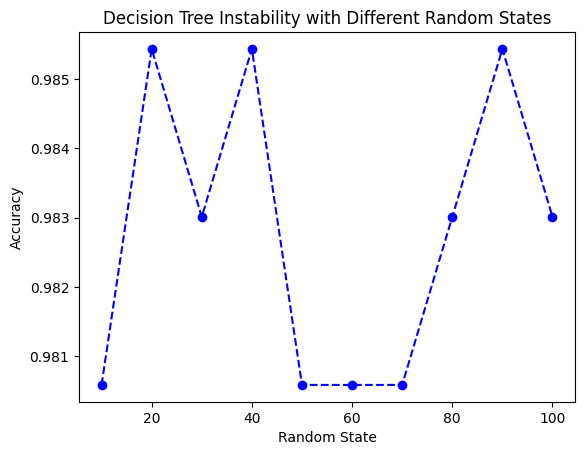

In [4]:
from sklearn.model_selection import cross_val_score

# Train multiple trees with different random states
scores = [DecisionTreeClassifier(random_state=i).fit(X_train, y_train).score(X_valid, y_valid) for i in range(10, 110, 10)]

# Plot the accuracy variation
plt.plot(range(10, 110, 10), scores, marker='o', linestyle='--', color='b')
plt.xlabel("Random State")
plt.ylabel("Accuracy")
plt.title("Decision Tree Instability with Different Random States")
plt.show()

# 5. Train a Random Forest Model

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
# TODO: Initialize and fit a RandomForestClassifier

# Evaluate performance
# TODO: Predict on X_valid and calculate accuracy

# 6. Cross-Validation for Hyperparameter Selection

In [6]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200]
}

# TODO: Perform GridSearchCV with RandomForestClassifier

# Print best parameters
# TODO: Print best parameters and best score

# 7. Compare Decision Tree vs Random Forest Performance

In [7]:
dt_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=5)
rf_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=5)

print(f"Decision Tree Cross-Val Accuracy: {dt_scores.mean():.4f} ± {dt_scores.std():.4f}")
print(f"Random Forest Cross-Val Accuracy: {rf_scores.mean():.4f} ± {rf_scores.std():.4f}")

Decision Tree Cross-Val Accuracy: 0.9811 ± 0.0071
Random Forest Cross-Val Accuracy: 0.9956 ± 0.0015


# 8. Feature Importance in Random Forests

In [8]:
# Extract feature importance
importances = rf.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='green')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()

NameError: name 'rf' is not defined

## **9. Conclusion**
- **Decision Trees** are simple but unstable, leading to variance in performance.
- **Random Forests** improve stability and accuracy by averaging predictions from multiple trees.
- Feature importance in Random Forests helps identify the most influential features.
- Cross-validation helps tune hyperparameters for better model performance.

### **Further Exploration**
- Try different `max_depth` or `min_samples_split` values in `DecisionTreeClassifier`.

# 10. Go Back to Other Labs

See how RandomForests do with the Breast Cancer Data Set and with the Colour Data Set